In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
dfg = pd.read_csv('wat-r10-good.csv')
dfm = pd.read_csv('wat-r10-mals.csv')

In [6]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,820,1,3,0xe0f80,0,0,3,2,8,0,0,30,14,800,8,32,36,1,1,1
1,936,4,2,0xe76c0,1,0,3,2,8,27,11,29,13,928,9,30,37,1,1,1
2,1358,0,3,0xe2280,0,0,3,2,8,0,0,26,10,1338,13,4,17,1,1,1
3,1366,4,0,0xe2280,1,0,3,2,8,26,10,29,13,1362,13,3,17,1,1,1
4,1418,0,1,0xe2280,2,0,3,2,8,29,13,26,10,1406,13,25,35,1,1,1


In [7]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,247,1,3,0xecf80,0,0,3,2,8,1,1,30,14,231,4,21,28,1,1,0
1,818,1,3,0xe0f80,0,0,3,2,8,0,0,30,14,798,17,59,66,1,1,0
2,935,4,2,0xe76c0,1,0,3,2,8,27,11,29,13,927,18,42,55,1,1,0
3,1000,1,3,0x1adf80,0,0,3,2,8,1,1,30,14,984,20,61,61,1,1,0
4,1269,0,3,0x124280,0,0,3,2,8,1,1,26,10,1253,26,28,61,1,1,0


In [8]:
df = dfg.append(dfm, ignore_index=True)

In [9]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,820,1,3,0xe0f80,0,0,3,2,8,0,0,30,14,800,8,32,36,1,1,1
1,936,4,2,0xe76c0,1,0,3,2,8,27,11,29,13,928,9,30,37,1,1,1
2,1358,0,3,0xe2280,0,0,3,2,8,0,0,26,10,1338,13,4,17,1,1,1
3,1366,4,0,0xe2280,1,0,3,2,8,26,10,29,13,1362,13,3,17,1,1,1
4,1418,0,1,0xe2280,2,0,3,2,8,29,13,26,10,1406,13,25,35,1,1,1


In [10]:
df = df.sort_values('time')

In [11]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
8604,247,1,3,0xecf80,0,0,3,2,8,1,1,30,14,231,4,21,28,1,1,0
8605,818,1,3,0xe0f80,0,0,3,2,8,0,0,30,14,798,17,59,66,1,1,0
0,820,1,3,0xe0f80,0,0,3,2,8,0,0,30,14,800,8,32,36,1,1,1
8606,935,4,2,0xe76c0,1,0,3,2,8,27,11,29,13,927,18,42,55,1,1,0
1,936,4,2,0xe76c0,1,0,3,2,8,27,11,29,13,928,9,30,37,1,1,1
8607,1000,1,3,0x1adf80,0,0,3,2,8,1,1,30,14,984,20,61,61,1,1,0
8608,1269,0,3,0x124280,0,0,3,2,8,1,1,26,10,1253,26,28,61,1,1,0
8609,1277,4,0,0x124280,1,0,3,2,8,26,10,29,13,1273,26,27,61,1,1,0
8610,1332,0,1,0x124280,2,0,3,2,8,29,13,26,10,1320,26,26,45,1,1,0
8611,1358,0,3,0xe2280,0,0,3,2,8,0,0,26,10,1338,27,9,45,1,1,0


In [12]:
df.to_csv('wat-r10-pkt.csv',index=False)

In [13]:
df = pd.read_csv("wat-r10-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,247,1,3,0xecf80,0,0,3,2,8,1,1,30,14,231,4,21,28,1,1,0
1,818,1,3,0xe0f80,0,0,3,2,8,0,0,30,14,798,17,59,66,1,1,0
2,820,1,3,0xe0f80,0,0,3,2,8,0,0,30,14,800,8,32,36,1,1,1
3,935,4,2,0xe76c0,1,0,3,2,8,27,11,29,13,927,18,42,55,1,1,0
4,936,4,2,0xe76c0,1,0,3,2,8,27,11,29,13,928,9,30,37,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16832,3251439,4,2,0x1152c0,5,2,1,2,8,27,11,29,13,3251417,10026,24,42,1,1,1
16833,3251446,4,2,0x1152c0,5,3,1,2,8,27,11,29,13,3251417,10026,20,42,1,1,1
16834,3251453,4,2,0x1152c0,5,4,2,2,8,27,11,29,13,3251417,10026,14,42,1,1,1
16835,3251454,4,2,0x4d2c0,1,0,3,2,9,27,11,29,13,3251418,10027,13,42,1,1,1


In [14]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,0.050886,-0.000118,0.058461,0.018420,-0.026785,NaN,-0.003747,0.042644,0.041120,-0.016121,-0.011854,1.000000,0.982552,-0.058302,-0.101959,-0.168705,-0.201572,0.080399
outport,0.050886,1.000000,-0.718053,0.405164,-0.021110,0.030296,NaN,0.437395,0.870404,0.842842,-0.154536,-0.016000,0.050892,0.059086,0.102138,0.266970,0.004577,0.033175,0.003463
inport,-0.000118,-0.718053,1.000000,-0.257098,0.089110,-0.128587,NaN,-0.570480,-0.792994,-0.764795,0.160045,0.101854,-0.000125,-0.008238,-0.030431,-0.086114,-0.025981,-0.068078,-0.000420
packet_type,0.058461,0.405164,-0.257098,1.000000,0.361289,-0.521392,NaN,0.014309,0.306289,0.288509,-0.319185,-0.257828,0.058467,0.065037,0.094195,0.076955,0.014724,0.011039,0.009348
flit_id,0.018420,-0.021110,0.089110,0.361289,1.000000,-0.130595,NaN,-0.204546,-0.116690,-0.125984,0.282163,0.277563,0.018414,0.018676,-0.017851,0.037637,0.022134,0.007985,0.004285
flit_type,-0.026785,0.030296,-0.128587,-0.521392,-0.130595,1.000000,NaN,0.295232,0.168207,0.181611,-0.407173,-0.400549,-0.026788,-0.027233,-0.098579,0.082683,-0.028912,0.016595,-0.006008
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,-0.003747,0.437395,-0.570480,0.014309,-0.204546,0.295232,NaN,1.000000,0.377214,0.347019,-0.320863,-0.262216,-0.003745,0.000913,-0.019974,0.056315,0.010220,0.038344,-0.001700
src_ni,0.042644,0.870404,-0.792994,0.306289,-0.116690,0.168207,NaN,0.377214,1.000000,0.997648,-0.196294,-0.127722,0.042652,0.053942,0.092650,0.249228,0.001108,0.035540,0.001158
src_router,0.041120,0.842842,-0.764795,0.288509,-0.125984,0.181611,NaN,0.347019,0.997648,1.000000,-0.193579,-0.130126,0.041128,0.052362,0.093857,0.253317,-0.001171,0.032612,-0.000328


In [15]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [16]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,1,3,0,0,3,2,8,30,14,231,4,1,1
1,1,3,0,0,3,2,8,30,14,798,17,1,1
2,1,3,0,0,3,2,8,30,14,800,8,1,1
3,4,2,1,0,3,2,8,29,13,927,18,1,1
4,4,2,1,0,3,2,8,29,13,928,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16832,4,2,5,2,1,2,8,29,13,3251417,10026,1,1
16833,4,2,5,3,1,2,8,29,13,3251417,10026,1,1
16834,4,2,5,4,2,2,8,29,13,3251417,10026,1,1
16835,4,2,1,0,3,2,9,29,13,3251418,10027,1,1


In [17]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.25,1.000000,0.000000,0.00,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0
1,0.25,1.000000,0.000000,0.00,1.000000,0.0,0.000000,1.000000,1.000000,0.000174,0.001263,0.0,0.0
2,0.25,1.000000,0.000000,0.00,1.000000,0.0,0.000000,1.000000,1.000000,0.000175,0.000389,0.0,0.0
3,1.00,0.666667,0.166667,0.00,1.000000,0.0,0.000000,0.966667,0.928571,0.000214,0.001360,0.0,0.0
4,1.00,0.666667,0.166667,0.00,1.000000,0.0,0.000000,0.966667,0.928571,0.000214,0.000486,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16832,1.00,0.666667,0.833333,0.50,0.333333,0.0,0.000000,0.966667,0.928571,0.999990,0.973482,0.0,0.0
16833,1.00,0.666667,0.833333,0.75,0.333333,0.0,0.000000,0.966667,0.928571,0.999990,0.973482,0.0,0.0
16834,1.00,0.666667,0.833333,1.00,0.666667,0.0,0.000000,0.966667,0.928571,0.999990,0.973482,0.0,0.0
16835,1.00,0.666667,0.166667,0.00,1.000000,0.0,0.333333,0.966667,0.928571,0.999991,0.973579,0.0,0.0


In [18]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.718053,0.405164,-0.021110,0.030296,NaN,0.437395,-0.154536,-0.016000,0.050892,0.059086,0.004577,0.033175,0.003463
1,-0.718053,1.000000,-0.257098,0.089110,-0.128587,NaN,-0.570480,0.160045,0.101854,-0.000125,-0.008238,-0.025981,-0.068078,-0.000420
2,0.405164,-0.257098,1.000000,0.361289,-0.521392,NaN,0.014309,-0.319185,-0.257828,0.058467,0.065037,0.014724,0.011039,0.009348
3,-0.021110,0.089110,0.361289,1.000000,-0.130595,NaN,-0.204546,0.282163,0.277563,0.018414,0.018676,0.022134,0.007985,0.004285
4,0.030296,-0.128587,-0.521392,-0.130595,1.000000,NaN,0.295232,-0.407173,-0.400549,-0.026788,-0.027233,-0.028912,0.016595,-0.006008
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.437395,-0.570480,0.014309,-0.204546,0.295232,NaN,1.000000,-0.320863,-0.262216,-0.003745,0.000913,0.010220,0.038344,-0.001700
7,-0.154536,0.160045,-0.319185,0.282163,-0.407173,NaN,-0.320863,1.000000,0.972626,-0.016126,-0.021207,0.020629,-0.016562,-0.001953
8,-0.016000,0.101854,-0.257828,0.277563,-0.400549,NaN,-0.262216,0.972626,1.000000,-0.011858,-0.018703,0.013137,-0.017996,-0.001789
9,0.050892,-0.000125,0.058467,0.018414,-0.026788,NaN,-0.003745,-0.016126,-0.011858,1.000000,0.982552,-0.168705,-0.201572,0.080399


In [19]:
train_Y = df['target']

In [20]:
train_Y

0        0
1        0
2        1
3        0
4        1
        ..
16832    1
16833    1
16834    1
16835    1
16836    1
Name: target, Length: 16837, dtype: int64

In [21]:
pca = PCA(0.95)

In [22]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
principal_components = pca.transform(train_X)
principal_components

array([[-0.60043708,  0.89729398, -0.41696327, -0.39930747, -0.27733557,
        -0.29984966],
       [-0.60038698,  0.89691457, -0.41610467, -0.399363  , -0.27737999,
        -0.29981809],
       [-0.60041728,  0.89713996, -0.41661444, -0.39933046, -0.27735389,
        -0.29983684],
       ...,
       [ 0.19293208, -0.74285452,  0.37943709,  0.25219451, -0.46575148,
        -0.32541451],
       [ 0.32086471,  0.20764569,  0.75301788, -0.49506289, -0.33449089,
        -0.36222368],
       [ 0.81391417,  0.50773892,  0.97683717,  0.80570294,  0.34763941,
        -0.14949747]])

In [24]:
pca.explained_variance_ratio_

array([0.32667854, 0.19296921, 0.17348729, 0.10662042, 0.10042631,
       0.0507408 ])

In [25]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

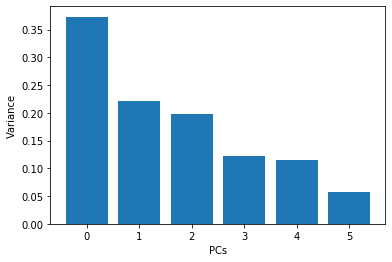

In [26]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [27]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5
0,-0.600437,0.897294,-0.416963,-0.399307,-0.277336,-0.299850
1,-0.600387,0.896915,-0.416105,-0.399363,-0.277380,-0.299818
2,-0.600417,0.897140,-0.416614,-0.399330,-0.277354,-0.299837
3,0.138480,0.701413,-0.528367,-0.400811,-0.231313,-0.618939
4,0.138450,0.701638,-0.528877,-0.400778,-0.231287,-0.618957
...,...,...,...,...,...,...
16832,0.202294,-0.660359,0.420958,-0.049845,0.043674,-0.290942
16833,0.179941,-0.785155,0.366521,0.073767,-0.108327,-0.261125
16834,0.192932,-0.742855,0.379437,0.252195,-0.465751,-0.325415
16835,0.320865,0.207646,0.753018,-0.495063,-0.334491,-0.362224


In [28]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,target
0,-0.600437,0.897294,-0.416963,-0.399307,-0.277336,-0.299850,0
1,-0.600387,0.896915,-0.416105,-0.399363,-0.277380,-0.299818,0
2,-0.600417,0.897140,-0.416614,-0.399330,-0.277354,-0.299837,1
3,0.138480,0.701413,-0.528367,-0.400811,-0.231313,-0.618939,0
4,0.138450,0.701638,-0.528877,-0.400778,-0.231287,-0.618957,1
...,...,...,...,...,...,...,...
16832,0.202294,-0.660359,0.420958,-0.049845,0.043674,-0.290942,1
16833,0.179941,-0.785155,0.366521,0.073767,-0.108327,-0.261125,1
16834,0.192932,-0.742855,0.379437,0.252195,-0.465751,-0.325415,1
16835,0.320865,0.207646,0.753018,-0.495063,-0.334491,-0.362224,1


In [29]:
final_df.corr()

,0,1,2,3,4,5,target
0,1.000000e+00,-9.872119e-16,-6.450324e-16,-2.608199e-15,-7.509241e-16,-3.112583e-15,0.002898
1,-9.872119e-16,1.000000e+00,-1.065490e-15,-4.507854e-15,-1.809848e-16,9.941613e-16,-0.019918
2,-6.450324e-16,-1.065490e-15,1.000000e+00,-1.413633e-15,-2.708494e-16,-1.202797e-16,0.030764
3,-2.608199e-15,-4.507854e-15,-1.413633e-15,1.000000e+00,-4.422847e-15,3.428842e-15,0.002325
4,-7.509241e-16,-1.809848e-16,-2.708494e-16,-4.422847e-15,1.000000e+00,7.381678e-17,0.002016
5,-3.112583e-15,9.941613e-16,-1.202797e-16,3.428842e-15,7.381678e-17,1.000000e+00,0.000312
target,2.897563e-03,-1.991831e-02,3.076428e-02,2.324973e-03,2.015626e-03,3.116261e-04,1.000000


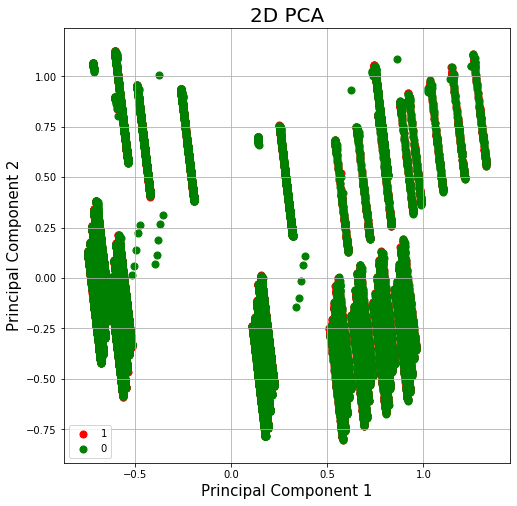

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,1,3,0,0,3,2,8,1,1,30,14,231,4,21,28,1,1,0
1,1,3,0,0,3,2,8,0,0,30,14,798,17,59,66,1,1,0
2,1,3,0,0,3,2,8,0,0,30,14,800,8,32,36,1,1,1
3,4,2,1,0,3,2,8,27,11,29,13,927,18,42,55,1,1,0
4,4,2,1,0,3,2,8,27,11,29,13,928,9,30,37,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16832,4,2,5,2,1,2,8,27,11,29,13,3251417,10026,24,42,1,1,1
16833,4,2,5,3,1,2,8,27,11,29,13,3251417,10026,20,42,1,1,1
16834,4,2,5,4,2,2,8,27,11,29,13,3251417,10026,14,42,1,1,1
16835,4,2,1,0,3,2,9,27,11,29,13,3251418,10027,13,42,1,1,1


In [32]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [33]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [34]:
seed = 7
np.random.seed(seed)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [36]:
model = Sequential()

In [37]:
n_cols = train_X.shape[1]
n_cols

13

In [38]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [40]:
model.fit(x_train, y_train, epochs=100, validation_split=0.4)

Train on 6869 samples, validate on 4580 samples
Epoch 1/100
6869/6869 [==============================] - 1s 176us/step - loss: 0.2499 - accuracy: 0.5120 - val_loss: 0.2498 - val_accuracy: 0.5059
Epoch 2/100
6869/6869 [==============================] - 1s 112us/step - loss: 0.2498 - accuracy: 0.5161 - val_loss: 0.2498 - val_accuracy: 0.5046
Epoch 3/100
6869/6869 [==============================] - 1s 101us/step - loss: 0.2498 - accuracy: 0.5152 - val_loss: 0.2498 - val_accuracy: 0.5050
Epoch 4/100
6869/6869 [==============================] - 1s 93us/step - loss: 0.2497 - accuracy: 0.5139 - val_loss: 0.2498 - val_accuracy: 0.5076
Epoch 5/100
6869/6869 [==============================] - 1s 95us/step - loss: 0.2497 - accuracy: 0.5159 - val_loss: 0.2498 - val_accuracy: 0.5076
Epoch 6/100
6869/6869 [==============================] - 1s 95us/step - loss: 0.2497 - accuracy: 0.5164 - val_loss: 0.2498 - val_accuracy: 0.5105
Epoch 7/100
6869/6869 [==============================] - 1s 96us/step - l

In [41]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [42]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.84%


In [43]:
dff = pd.read_csv('wat-r10-pkt.csv',nrows=500)

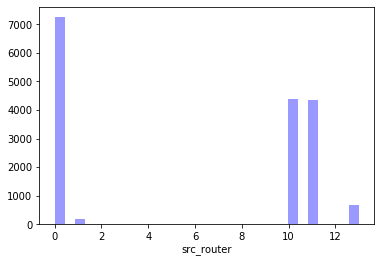

In [44]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

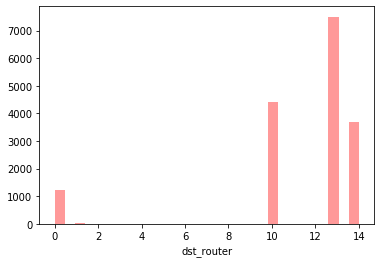

In [45]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

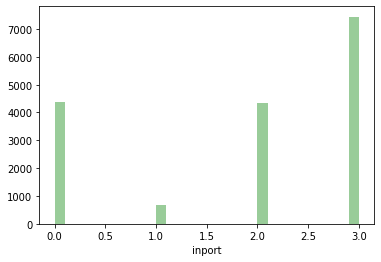

In [46]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

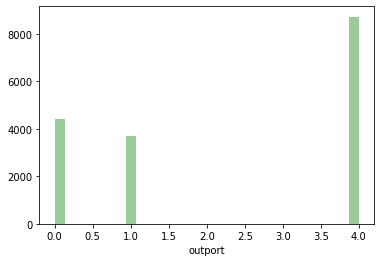

In [47]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

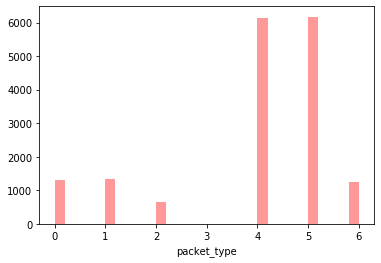

In [48]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')